In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
import math

In [3]:
df = pd.read_csv("../prices.txt", sep='\s+', header=None, index_col=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.78280,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
std,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.26656,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.01000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.91750,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.69000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
75%,14.582500,72.915000,47.800000,50.380000,56.720000,12.210000,18.410000,47.50250,68.912500,52.192500,...,32.302500,70.352500,13.232500,62.107500,37.602500,52.892500,61.855000,35.032500,43.525000,57.002500
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.09000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000


<Axes: ylabel='8'>

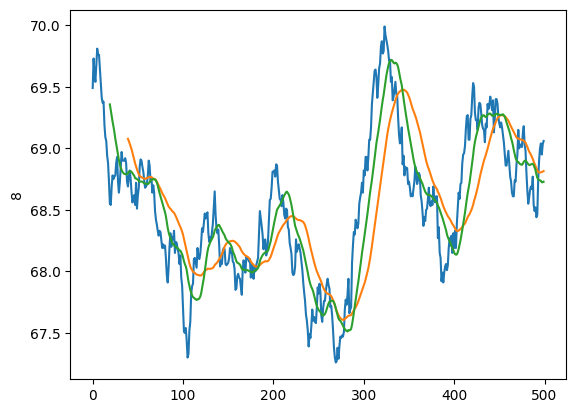

In [13]:
# Deal with 8
sns.lineplot(df[8])
sns.lineplot(df[8].rolling(40).mean())
sns.lineplot(df[8].rolling(20).mean())

In [5]:
# Check if stationary
# Non-stationary
def test_stationary(series):
    print("Results of Dickey-Fuller Test:")
    dftest = stattools.adfuller(series, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    print("Results of KPSS Test:")
    kpsstest = stattools.kpss(series, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

test_stationary(df[8])

Results of Dickey-Fuller Test:
Test Statistic                  -2.613868
p-value                          0.090165
#Lags Used                       2.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Results of KPSS Test:
Test Statistic            0.665248
p-value                   0.016705
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [6]:
# Best order for ARIMA: (2, 0, 0)
model8 = sm.tsa.arima.ARIMA(endog=(df[8] - df[8].mean()), order=(2, 1, 1))
res8 = model8.fit()
print(res8.summary())

res8.save("../model8.pickle")

                               SARIMAX Results                                
Dep. Variable:                      8   No. Observations:                  500
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 447.039
Date:                Sun, 23 Jun 2024   AIC                           -886.078
Time:                        21:45:05   BIC                           -869.228
Sample:                             0   HQIC                          -879.466
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6735      0.145     -4.638      0.000      -0.958      -0.389
ar.L2          0.1572      0.048      3.294      0.001       0.064       0.251
ma.L1          0.7773      0.142      5.466      0.0

In [7]:
res8 = sm.load("../model8.pickle")
applied8 = res8.apply(df[8][0:100] - df[8].mean())
print(applied8.forecast(1).values[0] + df[8].mean(), df[8][100])

67.85658536284753 67.69


In [8]:
print(res8.resid)
print(res8.resid[1:].mean())
print(res8.resid[1:].std())
print(res8.resid[1:].max())

0      0.952700
1      0.240000
2     -0.153814
3     -0.067659
4      0.172100
         ...   
495    0.061481
496    0.034413
497   -0.105526
498    0.095125
499    0.024082
Length: 500, dtype: float64
-0.0007179878632538049
0.09889691523636979
0.33614225197037406


In [9]:
test_stationary(res8.resid)

Results of Dickey-Fuller Test:
Test Statistic                 -23.405139
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64
Results of KPSS Test:
Test Statistic           0.043741
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_25164\61105336.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")


In [10]:
print(df[8])
priceChange = np.array(df[8])[1:] - np.array(df[8])[:-1]

print(priceChange)
print(priceChange.mean())

print(priceChange.std())

0      69.49
1      69.73
2      69.60
3      69.54
4      69.68
       ...  
495    69.00
496    69.04
497    68.95
498    69.03
499    69.06
Name: 8, Length: 500, dtype: float64
[ 0.24 -0.13 -0.06  0.14  0.13 -0.05  0.   -0.12 -0.11 -0.12 -0.04  0.01
 -0.19 -0.1  -0.03 -0.12 -0.06 -0.15 -0.18 -0.01  0.15  0.09 -0.03  0.02
  0.01  0.1   0.05 -0.2  -0.09  0.08  0.13  0.12 -0.07  0.    0.    0.02
 -0.04 -0.15 -0.04  0.08  0.05 -0.07 -0.11 -0.08  0.04  0.02 -0.08  0.18
 -0.21  0.11  0.06  0.17  0.06 -0.01 -0.05 -0.04 -0.07 -0.06  0.01  0.02
  0.07  0.12 -0.04 -0.13  0.03 -0.12  0.06 -0.06 -0.15 -0.07 -0.04 -0.05
 -0.04  0.04 -0.01 -0.07 -0.06  0.03 -0.03  0.02 -0.1  -0.14 -0.06  0.12
  0.17  0.11 -0.11  0.08 -0.02  0.07 -0.18  0.09 -0.01 -0.05 -0.03 -0.09
  0.07 -0.18 -0.07 -0.19 -0.18 -0.01  0.04 -0.1  -0.14  0.03  0.19  0.07
  0.23  0.06  0.02  0.2   0.01 -0.04 -0.04  0.16 -0.07 -0.02  0.04  0.09
  0.12 -0.03  0.07  0.08 -0.04  0.03  0.02 -0.17 -0.07  0.04 -0.03  0.07
  0.07  0.13  0.1